# Bidirectional approach

In [16]:
#import libraries
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np 

In [2]:
path_to_file = "8_ways_data_science_can_help.txt" #Enter article name here

In [3]:
tokenizer = Tokenizer()

In [4]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(f'The length of the article is {len(text)}')

The length of the article is 6999


In [5]:
data = text.lower().replace('\xa0\xa0','')

In [6]:
data = text.lower().replace('\xa0','')
data = data.split(".")
#data

In [7]:
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)

In [8]:
print(total_words)

525


In [9]:
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        #print(i)
        n_gram_sequence = token_list[:i+1]
        #print("N_gram: "+ n_gram_sequence)
        input_sequences.append(n_gram_sequence)
#print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9901):
            print("\nReached acceptable accuary!")
            self.model.stop_training = True

In [41]:
callback = myCallback()

In [42]:
model = Sequential([
      Embedding(total_words,128,input_length=max_sequence_len - 1),
      Bidirectional(LSTM(128)),
      Dense(total_words,activation='softmax')
])

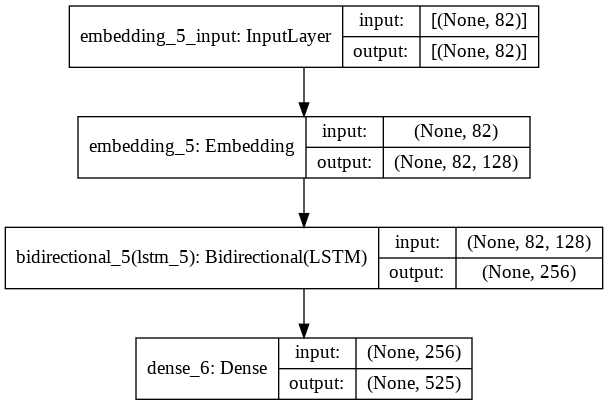

In [43]:
plot_model(model,"nlp.png",show_shapes=True)

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history = model.fit(xs,ys,epochs=1000,verbose=1,callbacks=[callback])

Epoch 1/1000
33/33 [==============================] - 3s 16ms/step - loss: 6.2061 - accuracy: 0.0138
Epoch 2/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.7772 - accuracy: 0.0295
Epoch 3/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.6411 - accuracy: 0.0446
Epoch 4/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.5983 - accuracy: 0.0412
Epoch 5/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.4619 - accuracy: 0.0487
Epoch 6/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.3415 - accuracy: 0.0450
Epoch 7/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.2270 - accuracy: 0.0628
Epoch 8/1000
33/33 [==============================] - 0s 12ms/step - loss: 5.0553 - accuracy: 0.0554
Epoch 9/1000
33/33 [==============================] - 0s 12ms/step - loss: 4.7876 - accuracy: 0.0798
Epoch 10/1000
33/33 [==============================] - 0s 12ms/step - loss: 4.5221 - accura

In [46]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

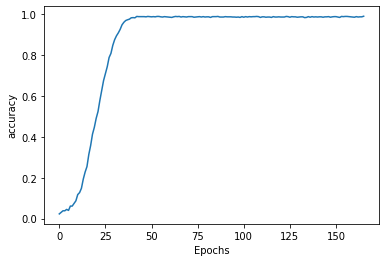

In [47]:
plot_graphs(history, 'accuracy')

In [49]:
#seed_text = "Using data science to optimize your budget"
#seed_text = "rich customer experience has always been an important factor"
seed_text = "This can be highly beneficial"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    #predicted = model.predict_classes(token_list,verbose=0)
    predicted = model.predict(token_list)
    rescaled_logits = tf.math.log(predicted) / temperature
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This can be highly beneficial as it tells the marketer exactly which channel and medium are delivering proper returns cross channel micro copy on landing pages pricing upsells cross sells product and content recommendations email marketing copy and offers coupon codes and discounts location based advertising campaigns real time push or mobile app messages speaking of the latter starbucks did a particularly impressive job with mobile marketing personalisation personalisation is a leads of data scientist can use data sources internal and external external external external external external external external external external external external external external and external external external external external the external external is


In [53]:
seed_text[0]

'T'

In [85]:
def next_char(text,temperature=1):
  print("started function")
  X_new = tokenizer.texts_to_sequences(text)
  print(f'X_new:{X_new}')
  print("tokenized")
  y_prob = model.predict(X_new) #[0,-1:,:]
  print("prob started")
  rescaled_logits = tf.math.log(predicted) / temperature
  char_id = tf.random.categorical(rescaled_logits,num_samples=1) + 1
  return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [86]:
def complete_text(text,n_chars=50,temperature=1):
  print("function started")
  for x in range(n_chars):
    print("startd loop")
    text += next_char(text,temperature)
  return text

In [88]:
complete_text(seed_text,n_chars=len(seed_text),temperature=0.2)

function started
startd loop
started function
X_new:[[], [], [], [243], [], [304], [5], [], [], [124], [], [], [], [], [], [], [], [], [], [124], [], [], [], [], [], [304], [], [5], [], [], [5], [243], [], [], [], [], [], [], [], [], [243], [], [], [], [], [], [], [5], [], [], [], [], [], [], [], [], [441], [5], [304], [], [], [], [], [], [], [], [304], [], [], [304], [], [5], [], [], [], [], [], [5], [], [], [], [], [], [], [], [], [], [], [5], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [243], [], [304], [], [], [243], [243], [], [304], [], [5], [], [], [], [], [], [], [], [304], [], [], [], [304], [], [], [], [], [], [], [], [], [5], [], [], [], [], [], [], [], [5], [], [], [243], [], [], [], [], [304], [], [], [], [], [], [], [243], [], [], [], [243], [], [304], [], [], [243], [243], [], [243], [], [], [], [243], [], [], [], [], [], [], [304], [], [], [5], [], [], [], [304], [], [], [], [], [], [], [], [], [], [304], [

IndexError: ignored

In [84]:
seed_text

'This can be highly beneficial as it tells the marketer exactly which channel and medium are delivering proper returns cross channel micro copy on landing pages pricing upsells cross sells product and content recommendations email marketing copy and offers coupon codes and discounts location based advertising campaigns real time push or mobile app messages speaking of the latter starbucks did a particularly impressive job with mobile marketing personalisation personalisation is a leads of data scientist can use data sources internal and external external external external external external external external external external external external external external and external external external external external the external external is'